In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
# Write your imports here

# Visualizing Linear Transformations
Write a code which visualizes a linear transformation. It should show "the old space" and "the new space" imposed on it.

Actually, if you don't want to write the code, I've already provided something for you. The following cell contains the `visualize_transform.py` code from last time. We'll examine it and see how we can use it to show our own transformations.

In [11]:
def visualize_transformation(matrix, plot_title):
    """
    Plots the linear transformation given by the specified matrix
    """
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", scale = 1)

    plt.show()

The code is mostly "housekeeping" - making the plot look nicer. It basically consits of several parts:
1. Visualize gridlines
2. Create the transformation from the matrix: `t = Affine2D(matrix)`
3. Visualize transformed gridlines

A quirk with `Affine2D()` is that it uses a 3x3 matrix. What's more, the last row is always `[0, 0, 1]`. This is because the third column corresponds to moving (translation) of the entire coordinate system. As you can imagine, this doesn't leave the origin fixed, therefore **translation is not a linear transformation**. It's an affine transformation, which is exactly what the code does. More info [here](https://stackoverflow.com/questions/10698962/why-do-2d-transformations-need-3x3-matrices).
For our purposes, we defined the 2D transformation matrix as:
$$ T=\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} $$
which we'll pass to the function as
$$ T=\begin{bmatrix}
a & b & 0 \\
c & d & 0 \\
0 & 0 & 1
\end{bmatrix} $$

**Note:** If you want to visualize translations, feel free to do so.

Let's see what various transformations look like.

C:\Users\VGeorgiev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


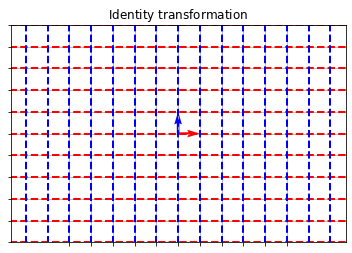

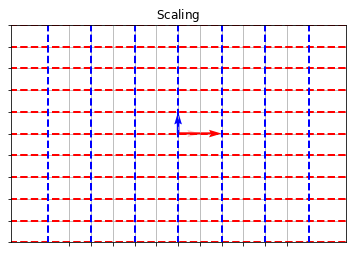

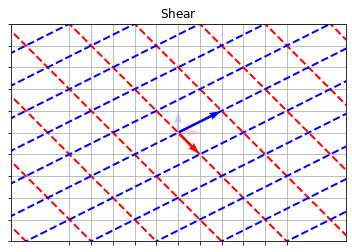

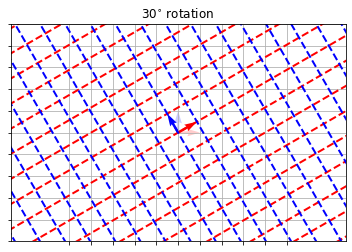

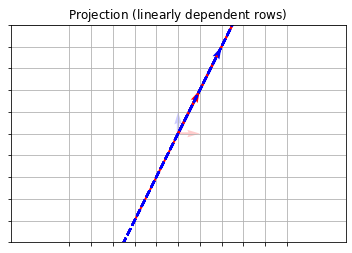

In [6]:
## Identity
matrix = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Identity\ transformation}$")

# Scaling
matrix = [
    [2, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")

# Shear
matrix = [
    [1, 2, 0],
    [-1, 1, 0],
    [0, 0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Shear}$")

# Rotation
matrix = [
    [np.cos(np.radians(30)), -np.sin(np.radians(30)), 0],
    [np.sin(np.radians(30)), np.cos(np.radians(30)), 0],
    [0, 0, 1]
]

visualize_transformation(matrix, r"$\mathrm{30^{\circ}\ rotation}$")

# Projection (linearly dependent rows)
matrix = [
    [1, 2, 0],
    [2, 4, 0],
    [0, 0, 1],
]

visualize_transformation(matrix, r"$\mathrm{Projection\ (linearly\ dependent\ rows)}$")

Feel free to experiment with other matrices and to see what transformation they will result in. Also feel free to write better visualization code.

C:\Users\VGeorgiev\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


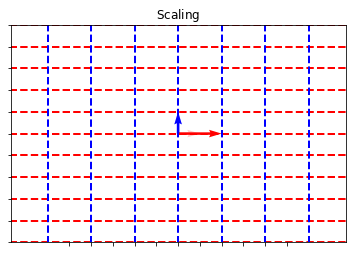

In [10]:
# Scaling
matrix = [
    [2, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

visualize_transformation(matrix, r"$\mathrm{Scaling}$")